# Определение перспективного тарифа для телеком-компании

## Описание проекта
### Обзор
Проект представляет собой исследование поведения клиентов федерального оператора сотовой связи. Заказчик исследования - компания «Мегалайн». Компания предлагает клиентам два тарифных плана: "Smart" и "Ultra". Нужно определить,  какой тариф приносит больше денег, чтобы скорректировать рекламный бюджет.

Материал для анализа - выборка данных по 500 клиентам опсоса за 2018 год. Имеется следующая информация о пользователях: кто они, откуда, каким тарифом пользуются, количество звонков, сообщений, Мб интернет-трафика за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод, какой тариф выгодней для заказчика.

### Описание тарифов
#### Тариф "Smart"
* Ежемесячная плата: 550 рублей
* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета: 
    * 1 минута разговора: 3 рубля;
    * 1 сообщение: 3 рубля; 
    * 1 Гб интернет-трафика: 200 рублей.
#### Тариф "Ultra"
* Ежемесячная плата: 1950 рублей
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета: 
    * 1 минута разговора: 1 рубль; 
    * 1 сообщение: 1 рубль; 
    * 1 Гб интернет-трафика: 150 рублей.

#### Примечание:
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, он будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

## Подготовка данных
### Импорт данных из файлов
Сохраняем данные из исходных файлов во временных переменных `calls`, `internet`, `messages`, `tariffs`, `users`. Предварительно оценим информацию в получившихся таблицах.

In [71]:
from pathlib import Path
import pandas as pd
pd.set_option('display.float_format', '{:,.2f}'.format)


my_path = Path('/home/klarazetkin/Documents/yandex/module_2/project_1')
if my_path.is_dir():
    calls = pd.read_csv('/home/klarazetkin/Documents/yandex/module_2/project_1/calls.csv')
    internet = pd.read_csv('/home/klarazetkin/Documents/yandex/module_2/project_1/internet.csv')
    messages = pd.read_csv('/home/klarazetkin/Documents/yandex/module_2/project_1/messages.csv')
    tariffs = pd.read_csv('/home/klarazetkin/Documents/yandex/module_2/project_1/tariffs.csv')
    users = pd.read_csv('/home/klarazetkin/Documents/yandex/module_2/project_1/users.csv')
else:
    calls = pd.read_csv('/datasets/calls.csv')
    internet = pd.read_csv('/datasets/internet.csv')
    messages = pd.read_csv('/datasets/messages.csv')
    tariffs = pd.read_csv('/datasets/tariffs.csv')
    users = pd.read_csv('/datasets/users.csv')



In [72]:
display(calls.head())
calls.info()
# call_date заменить на DateTime

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [73]:
display(internet.head())
internet.info()
# session_date заменить на DateTime

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,"1,052.81",2018-09-07,1000
2,2,1000_2,"1,197.26",2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [74]:
display(messages.head())
messages.info()
# message_date заменить на DateTime

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [75]:
display(tariffs.head())
tariffs.info()
# нет претензий к типам данных

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [76]:
display(users.head())
users.info()
# reg_date, churn_date заменить на DateTime

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


### Проверка типов данных
Типы данных в основном адекватны, нужно заменить тип данных для дат на `DateTime`. Заменить тип данных для `id`, там, где это `object` малой кровью не получится, оставим так.

In [77]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y.%m.%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y.%m.%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y.%m.%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y.%m.%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y.%m.%d')

### Пропуски в данных
Пропусков в данных, которые бы требовали заполнения, нет. Есть null значения в колонке `churn_date` датасета `users`, но заполнять их не нужно: пустые значения означают, что тариф действовал на момент составления выборки.

### Ошибки в данных
Проверка минимальных, максимальных значений данных показывает, что они адекватны. Явных ошибок в данных нет.

In [78]:
display(calls.describe())
display(internet.describe())
display(messages.describe())
display(users.describe())

,duration,user_id
count,"202,607.00","202,607.00"
mean,6.76,"1,253.94"
std,5.84,144.72
min,0.00,"1,000.00"
25%,1.30,"1,126.00"
50%,6.00,"1,260.00"
75%,10.70,"1,379.00"
max,38.00,"1,499.00"


,Unnamed: 0,mb_used,user_id
count,"149,396.00","149,396.00","149,396.00"
mean,"74,697.50",370.19,"1,252.10"
std,"43,127.05",278.30,144.05
min,0.00,0.00,"1,000.00"
25%,"37,348.75",138.19,"1,130.00"
50%,"74,697.50",348.01,"1,251.00"
75%,"112,046.25",559.55,"1,380.00"
max,"149,395.00","1,724.83","1,499.00"


,user_id
count,"123,036.00"
mean,"1,256.99"
std,143.52
min,"1,000.00"
25%,"1,134.00"
50%,"1,271.00"
75%,"1,381.00"
max,"1,499.00"


,user_id,age
count,500.00,500.00
mean,"1,249.50",46.59
std,144.48,16.67
min,"1,000.00",18.00
25%,"1,124.75",32.00
50%,"1,249.50",46.00
75%,"1,374.25",62.00
max,"1,499.00",75.00


### Проверка дубликатов
Явных дубликатов в данных не обнаружено.

In [79]:
print(calls.duplicated().sum())
print(internet.duplicated().sum())
print(messages.duplicated().sum())
print(users.duplicated().sum())

0
0
0
0


### Вывод
Данные пригодны для анализа.

## Подготовка пользовательских данных
Сгруппируем данные по пользователям: 
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячную выручку с каждого пользователя 

In [80]:
# Сначала добавим в таблицу `calls` колонку `rounded duration`, 
# в которую запишем продолжительность звонков, округленных в верхнюю сторону.

import math

def ceiler(el):
    return math.ceil(el)

calls['rounded_duration'] = calls['duration'].apply(ceiler)
calls.head(10)

,id,call_date,duration,user_id,rounded_duration
0,1000_0,2018-07-25,0.00,1000,0
1,1000_1,2018-08-17,0.00,1000,0
2,1000_2,2018-06-11,2.85,1000,3
3,1000_3,2018-09-21,13.80,1000,14
4,1000_4,2018-12-15,5.18,1000,6
5,1000_5,2018-11-02,0.00,1000,0
6,1000_6,2018-10-18,0.00,1000,0
7,1000_7,2018-08-22,18.31,1000,19
8,1000_8,2018-09-15,18.44,1000,19
9,1000_9,2018-08-15,0.00,1000,0


In [81]:
# Проверила: метод np.ceil() сработал, хотя до этого - нет
import numpy as np
calls['rounded_duration_2'] = np.ceil(calls['duration'])
print(calls.head())

       id  call_date  duration  user_id  rounded_duration  rounded_duration_2
0  1000_0 2018-07-25      0.00     1000                 0                0.00
1  1000_1 2018-08-17      0.00     1000                 0                0.00
2  1000_2 2018-06-11      2.85     1000                 3                3.00
3  1000_3 2018-09-21     13.80     1000                14               14.00
4  1000_4 2018-12-15      5.18     1000                 6                6.00


In [82]:
# Теперь добавим колонку `month` в таблицы `calls`, `internet`, `messages`
calls['month'] = calls['call_date'].dt.month
internet['month'] = internet['session_date'].dt.month
messages['month'] = messages['message_date'].dt.month

In [83]:
# Сгруппируем данные в таблицах `calls`, `internet`, `messages` по `user_id` и `month`, 
# результат сохраним в промежуточных таблицах
user_stats_calls = calls.groupby(['user_id', 'month'])['rounded_duration'].agg(['sum', 'count'])
user_stats_calls = user_stats_calls.rename(columns={'sum': 'minutes_sum', 'count': 'calls_count'})
print(type(user_stats_calls))

user_stats_messages = messages.groupby(['user_id', 'month'])['id'].agg('count')
print(type(user_stats_messages))

user_stats_internet = internet.groupby(['user_id', 'month'])['mb_used'].agg('sum')
print(type(user_stats_internet))

display(user_stats_calls.head())
display(user_stats_messages.head())
display(user_stats_internet.head())

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


minutes_sum  calls_count
user_id month                          
1000    5              159           22
        6              172           43
        7              340           47
        8              408           52
        9              466           58

user_id  month
1000     5        22
         6        60
         7        75
         8        81
         9        57
Name: id, dtype: int64

user_id  month
1000     5        2,253.49
         6       23,233.77
         7       14,003.64
         8       14,055.93
         9       14,568.91
Name: mb_used, dtype: float64

In [84]:
# Объединим информацию по пользователям, сгруппированную по месяцам, в таблице user_stats
user_stats = user_stats_calls.merge(user_stats_messages, on=['user_id', 'month'], how='outer') 
user_stats = user_stats.rename(columns={'id': 'messages_count'})
display(user_stats.head())

user_stats = user_stats.merge(user_stats_internet, on=['user_id', 'month'], how='outer')
display(user_stats.head())

minutes_sum  calls_count  messages_count
user_id month                                          
1000    5           159.00        22.00           22.00
        6           172.00        43.00           60.00
        7           340.00        47.00           75.00
        8           408.00        52.00           81.00
        9           466.00        58.00           57.00

minutes_sum  calls_count  messages_count   mb_used
user_id month                                                    
1000    5           159.00        22.00           22.00  2,253.49
        6           172.00        43.00           60.00 23,233.77
        7           340.00        47.00           75.00 14,003.64
        8           408.00        52.00           81.00 14,055.93
        9           466.00        58.00           57.00 14,568.91

Проверим информацию в полученной таблице `user_stats` на наличие пропусков. Пропуски есть во всех колонках, их можно заменить на нули: они означают, что в данном месяце пользователь не использовал услугу.

In [85]:
display(user_stats.isna().mean() * 100)
# display(user_stats.head(50))

user_stats = user_stats.fillna(0)
display(user_stats.isna().mean() * 100)

minutes_sum       1.24
calls_count       1.24
messages_count   15.46
mb_used           0.34
dtype: float64

minutes_sum      0.00
calls_count      0.00
messages_count   0.00
mb_used          0.00
dtype: float64

Рассчитаем помесячную выручку с каждого пользователя, результат запишем в колонку `amount_to_pay` таблицы `user_stats`. 

Для расчета помесячной выручки нужно вычесть бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика, остатки умножить на значения из тарифного плана и прибавить абонентскую плату, соответствующую тарифному плану.

In [86]:
# Сделаем `reset_index` в таблице `user_stats`
user_stats = user_stats.reset_index()
display(user_stats.head())
# user_stats.columns

,user_id,month,minutes_sum,calls_count,messages_count,mb_used
0,1000,5,159.00,22.00,22.00,"2,253.49"
1,1000,6,172.00,43.00,60.00,"23,233.77"
2,1000,7,340.00,47.00,75.00,"14,003.64"
3,1000,8,408.00,52.00,81.00,"14,055.93"
4,1000,9,466.00,58.00,57.00,"14,568.91"


In [87]:
# Добавим колонку `tariff` в таблицу `user_stats`

user_tariffs = users.loc[:, ['user_id', 'tariff']]
display(user_tariffs.head())

user_stats = user_stats.merge(user_tariffs, on='user_id', how='left')
display(user_stats.head())

,user_id,tariff
0,1000,ultra
1,1001,smart
2,1002,smart
3,1003,ultra
4,1004,ultra


,user_id,month,minutes_sum,calls_count,messages_count,mb_used,tariff
0,1000,5,159.00,22.00,22.00,"2,253.49",ultra
1,1000,6,172.00,43.00,60.00,"23,233.77",ultra
2,1000,7,340.00,47.00,75.00,"14,003.64",ultra
3,1000,8,408.00,52.00,81.00,"14,055.93",ultra
4,1000,9,466.00,58.00,57.00,"14,568.91",ultra


In [88]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [89]:
import math

def payment(user_info):
    tariff_name = user_info['tariff']
    tariff = tariffs.query('tariff_name == @tariff_name')
    excessive_minutes = max([float((user_info['minutes_sum'] - tariff['minutes_included'])), 0])
    excessive_messages = max([float((user_info['messages_count'] - tariff['messages_included'])), 0])
    excessive_gb = math.ceil(max([float((user_info['mb_used'] - tariff['mb_per_month_included'])), 0]) / 1024)

    flexible_payment = (
        excessive_minutes * tariff['rub_per_minute'] +
        excessive_messages * tariff['rub_per_message'] +
        excessive_gb * tariff['rub_per_gb']
    )          
    
    amount_to_pay = tariff['rub_monthly_fee'] + flexible_payment
    
    return(float(amount_to_pay))
           
    

In [90]:
payment(user_stats.loc[16])

1150.0

In [91]:
user_stats['amount_to_pay'] = user_stats.apply(lambda row: payment(row), axis=1)

In [92]:
user_stats.head()

,user_id,month,minutes_sum,calls_count,messages_count,mb_used,tariff,amount_to_pay
0,1000,5,159.00,22.00,22.00,"2,253.49",ultra,"1,950.00"
1,1000,6,172.00,43.00,60.00,"23,233.77",ultra,"1,950.00"
2,1000,7,340.00,47.00,75.00,"14,003.64",ultra,"1,950.00"
3,1000,8,408.00,52.00,81.00,"14,055.93",ultra,"1,950.00"
4,1000,9,466.00,58.00,57.00,"14,568.91",ultra,"1,950.00"


## Анализ данных: описание поведения клиентов

Проанализируем поведение клиентов оператора, исходя из выборки. 

### Вся выборка данных

In [93]:
import numpy as np
display(user_stats.loc[:, ['minutes_sum', 'calls_count', 'messages_count', 'mb_used', 'amount_to_pay']].describe())
total_variance = np.var(user_stats.loc[:, ['minutes_sum', 'calls_count', 'messages_count', 'mb_used', 'amount_to_pay']], ddof=1)
total_std = np.std(user_stats.loc[:, ['minutes_sum', 'calls_count', 'messages_count', 'mb_used', 'amount_to_pay']], ddof=1)
print('Дисперсия:')
display(total_variance)
print('Стандартное отклонение:')
display(total_std)

,minutes_sum,calls_count,messages_count,mb_used,amount_to_pay
count,"3,214.00","3,214.00","3,214.00","3,214.00","3,214.00"
mean,451.24,63.04,38.28,"17,207.61","1,529.08"
std,241.91,33.24,36.15,"7,570.96",798.25
min,0.00,0.00,0.00,0.00,550.00
25%,282.00,40.00,9.00,"12,491.89",750.00
50%,443.00,62.00,30.00,"16,943.18","1,653.50"
75%,589.00,82.00,57.00,"21,424.62","1,950.00"
max,"1,673.00",244.00,224.00,"49,745.69","6,770.00"


Дисперсия:


minutes_sum          58,520.44
calls_count           1,104.66
messages_count        1,306.70
mb_used          57,319,416.72
amount_to_pay       637,204.80
dtype: float64

Стандартное отклонение:


minutes_sum        241.91
calls_count         33.24
messages_count      36.15
mb_used          7,570.96
amount_to_pay      798.25
dtype: float64

### Тариф "Smart"
#### Поведение пользователей
В среднем пользователи тарифа "Smart" в 2018 году использовали 417.9 минут, 33.4 сообщения и 16208.4 Мб интернет-трафика. Медианные значения - 422 минуты, 28 сообщений, 16506.8 Мб трафика. Лимиты по тарифу - 500 минут, 50 сообщений, 15360 Мб.

Обычно пользователи не укладываются в лимиты тарифа и платят за дополнительные услуги. 

Обычно пользователям не хватает интернет трафика, медианное значение используемого трафика (16506.84 Мб) уже выходит за лимиты тарифа (15360	Мб) - это означает, что даже половина пользователей тарифа не укладывается в лимит. Если лимит повысить, это будет выгодно пользователям, но не будет выгодно "Мегалайну".

Больше половины пользователей укладывается в лимит по минутам разговора, хотя начиная с третьего квартиля пользователи уже точно не укладываются в лимит. В лимит по смс укладывается чуть меньше 75% пользователей (третий квартиль проходит по границе - 51 сообщение).  

Несмотря на превышение лимитов по тарифу, средний (1289.97 рублей) и медианный (1023 рубля) сбор с пользователей тарифа "Smart" все равно ниже, чем фиксированная стоимость тарифа "Ultra" (1950 рублей). Т.е. даже с учетом выхода за лимиты основной массе пользователей не выгодно переходить на более дорогой тариф.

#### Основные метрики для тарифа "Smart": среднее, медиана, дисперсия, стандартное отклонение

In [94]:
print('Общие данные по тарифу:')
tariffs.query('tariff_name == "smart"')

Общие данные по тарифу:


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart


In [95]:
smart_stats = user_stats.query('tariff == "smart"')
display(smart_stats.loc[:, ['minutes_sum', 'calls_count', 'messages_count', 'mb_used', 'amount_to_pay']].describe())
smart_variance = np.var(smart_stats.loc[:, ['minutes_sum', 'calls_count', 'messages_count', 'mb_used', 'amount_to_pay']], ddof=1)
smart_std = np.std(smart_stats.loc[:, ['minutes_sum', 'calls_count', 'messages_count', 'mb_used', 'amount_to_pay']], ddof=1)
print('Дисперсия:')
display(smart_variance)
print('Стандартное отклонение:')
display(smart_std)

,minutes_sum,calls_count,messages_count,mb_used,amount_to_pay
count,"2,229.00","2,229.00","2,229.00","2,229.00","2,229.00"
mean,417.93,58.46,33.38,"16,208.39","1,289.97"
std,190.31,25.94,28.23,"5,870.48",818.40
min,0.00,0.00,0.00,0.00,550.00
25%,282.00,40.00,10.00,"12,643.01",550.00
50%,422.00,60.00,28.00,"16,506.84","1,023.00"
75%,545.00,76.00,51.00,"20,042.93","1,750.00"
max,"1,435.00",198.00,143.00,"38,552.45","6,770.00"


Дисперсия:


minutes_sum          36,219.32
calls_count             672.88
messages_count          796.81
mb_used          34,462,496.46
amount_to_pay       669,785.71
dtype: float64

Стандартное отклонение:


minutes_sum        190.31
calls_count         25.94
messages_count      28.23
mb_used          5,870.48
amount_to_pay      818.40
dtype: float64

#### "Smart" минуты

AttributeError: 'Rectangle' object has no property 'legend'

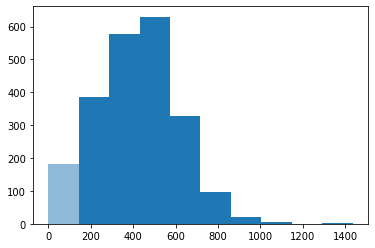

In [96]:
smart_stats['minutes_sum'].hist(alpha=0.5, legend=True)
smart_stats['minutes_sum'].hist(bins=[0, 500, 1435], alpha=0.5, legend=True)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
plt.xlim(0, 1435)
smart_stats['minutes_sum'].plot.kde()

Из гистограммы видно, что в лимит по минутам клиенты уложились более, чем в 1400 случаях из 2229. Чуть менее 800 раз клиенты не уложились в лимит. 

Из гистограммы плотности видно, что наиболее популярное значение минут в месяц в районе 450 - 500. Пик плотности - 300-550 минут.

Среднее (417.9) меньше медианы (422). Стандартное отклонение (190.31) вдвое меньше среднего, данные довольно однородны.

#### "Smart" сообщения

In [ ]:
smart_stats['messages_count'].hist(alpha=0.5)
smart_stats['messages_count'].hist(bins=[0, 50, 143], alpha=0.5)

Из гистограммы видно, что в лимит сообщений клиенты уложились в чуть более, чем 1600 случаях, не уложились - чуть меньше 600 раз.

In [ ]:
matplotlib.style.use('ggplot')
plt.xlim(0, 143)
smart_stats['messages_count'].plot.kde()

Из гистограммы видно, что наибольшая плотность приходится на клиентов, которые за месяц отправили около 5 сообщений. 

Данные скошены вправо, среднее (33.38) больше медианы (28). Стандартное отклонение (28.23) меньше среднего, данные достаточно однородны.

#### "Smart" интернет трафик

In [ ]:
smart_stats['mb_used'].hist(alpha=0.5)
smart_stats['mb_used'].hist(bins=[0, 15360, 38552], alpha=0.5)

Наиболее популярный сценарий поведения пользователей - превысить использование интернет трафика примерно на четверть лимита. В 900+ случаях из выборки пользователи укладываются в лимит, в то время как около 1300 случаев - нет.  

Среднее (16208.39) меньше медианы (16506.84). Стандартное отклонение (5870.48) примерно втрое меньше среднего, данные довольно однородны.

In [ ]:
matplotlib.style.use('ggplot')
plt.xlim(0, 38552)
smart_stats['mb_used'].plot.kde()

Гистограмма плотности подтвержает вывод выше.

### Тариф "Ultra"
#### Поведение пользователей

В среднем пользователи тарифа "Ultra" в 2018 году использовали 526.6 минут, 49.4 сообщения и 19468.8 Мб интернет-трафика. Медианные значения - 518 минут, 38 сообщений, 19308 Мб трафика. Лимиты по тарифу - 3000 минут, 1000 сообщений, 30720 Мб.

В большей части случаев пользователи укладываются в лимиты тарифа. По звонкам и сообщениям ни один пользователь даже не приблизился к лимиту (максимальное количество израсходованных минут - 1673 из 3000 доступных; максимальное количество сообщений - 224 из 1000 доступных). Медианные значения использованных минут разговора и сообщений выше, чем у пользователей тарифа "Smart" (518 против 422 минут (+22,7%), 38 сообщений против 28 (+35%)). 

Обычно пользователи тарифа "Ultra" укладываются и в лимиты по интернет трафику. Медианное значение используемого трафика 19308.01 Мб; третий квартиль проходит по границе 26837.69 при лимите 30720 Мб. 

Выход за пределы лимита был в 134 случаев из 985 (13.6%), соответственно, в этих случаях месячные расходы пользователей превысили фиксированную плату.

За счет этих пользователей среднее значение платежа по тарифу выросло до 2070.15 рублей, при том что медианное значение и значение третьего квартиля - 1950 рублей, то есть фиксированная плата по тарифу. Получается, что оплата сверх фиксированной суммы по тарифу "Ultra" зафиксирована в 13.6% случаев.

#### Основные метрики для тарифа "Ultra": среднее, медиана, дисперсия, стандартное отклонение

In [ ]:
print('Общие данные по тарифу:')
tariffs.query('tariff_name == "ultra"')

In [ ]:
ultra_stats = user_stats.query('tariff == "ultra"')
print('Тариф "Ultra":')
display(ultra_stats.loc[:, ['minutes_sum', 'calls_count', 'messages_count', 'mb_used', 'amount_to_pay']].describe())
ultra_variance = np.var(ultra_stats.loc[:, ['minutes_sum', 'calls_count', 'messages_count', 'mb_used', 'amount_to_pay']], ddof=1)
ultra_std = np.std(ultra_stats.loc[:, ['minutes_sum', 'calls_count', 'messages_count', 'mb_used', 'amount_to_pay']], ddof=1)
print('Дисперсия:')
display(ultra_variance)
print('Стандартное отклонение:')
display(ultra_std)

#### "Ultra" минуты

In [3]:
ultra_stats['minutes_sum'].hist(alpha=0.5, legend=True)
plt.xlim(0, 3000)

NameError: name 'ultra_stats' is not defined

In [ ]:
matplotlib.style.use('ggplot')
plt.xlim(0, 3000)
ultra_stats['minutes_sum'].plot.kde()

Пользователям ни разу не удалось выйти за лимит 3000 минут в месяц (максимум израсходованных минут 1673), поэтому ограничимся одной гистограммой с разбивкой по корзинам и одной гистограммой плотности. Диапазон значений для обеих гистограмм зададим от 0 до 3000 (максимум по тарифу), при этом реальный диапазон значений от 0 до 1673.

Наибольшая плотность месячного расхода минут на тарифе "Ultra" - около 500 минут в месяц - так же, как и на тарифе "Smart". Количество случаев, когда израсходовано больше 1000 минут в месяц, незначительно.

Среднее (526.62) незначительно больше медианы (518), данные скошены вправо. Стандартное отклонение (317.61) значительно меньше среднего, данные довольно однородны.

#### "Ultra" сообщения

In [ ]:
ultra_stats['messages_count'].hist(bins=20, alpha=0.5, legend=True)
plt.xlim(0, 250)

<AxesSubplot:ylabel='Density'>

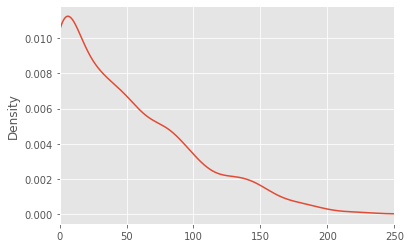

In [39]:
matplotlib.style.use('ggplot')
plt.xlim(0, 250)
ultra_stats['messages_count'].plot.kde()

Из графиков видно, что сообщения - не самая популярная услуга. Примерно в 280 случаях за месяц отправляли менее 10 смс (о том же говорит первая квартиль: в 25% случаев за месяц отправили не более 6 сообщений). За месячный лимит по тарифу (1000 смс) ни разу не вышел ни один пользователь. Максимальное значение отправленных сообщений - 244 штуки за месяц. 

Данные скошены вправо, среднее (49.36) больше медианы (38). Стандартное отклонение (47.8) чуть меньше среднего, данные достаточно однородны.

#### "Ultra" интернет трафик

In [97]:
ultra_stats['mb_used'].hist(alpha=0.5)
ultra_stats['mb_used'].hist(bins=[0, 30720, 49746], alpha=0.5)

NameError: name 'ultra_stats' is not defined

<AxesSubplot:ylabel='Density'>

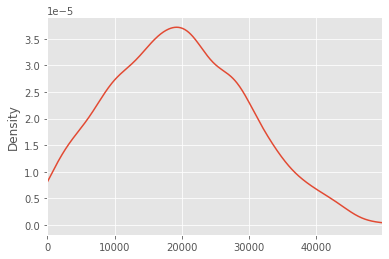

In [53]:
matplotlib.style.use('ggplot')
plt.xlim(0, 49746)
ultra_stats['mb_used'].plot.kde()

In [54]:
print(len(ultra_stats.query('mb_used > 30720')))
print(len(ultra_stats.query('mb_used > 30720')) / len(ultra_stats) * 100)

134
13.604060913705585


Пик графиков приходится примерно на 19500 Мб в месяц (среднее значение - 19468.81, медиана близка к среднему, чуть меньше его - 19308.01). Данные довольно однородны, стандартное отклонение 10087.17, это чуть больше половины среднего. В большей части случаев (около 850) пользователи тарифа уложились в лимит по интернет трафику; только 134 раза клиенты вышли за пределы лимита (это 13.6% случаев); другими словами, пользователи уложились в лимит в более, чем 75% случаев: граница третьего квартиля 26837.69 Мб при месячном лимите 30720 Мб.


## Проверка гипотез
### Гипотеза о различии средней выручки тарифов "Smart" и "Ultra"

Среднее значение выручки с одного клиента по тарифу "Smart" - 1289.97 рублей, по тарифу "Ultra" - 2070.15 рублей. Является это различие случайностью или тариф "Ultra" выгодней для оператора связи?

Проверим гипотезу о различии средней выручки с пользователей тарифов "Smart" и "Ultra". Нулевая гипотеза должна содержать знак равенства, поэтому сформулируем ее так:

**H0**: средняя выручка с пользователей тарифа "Smart" равна средней выручке с пользователей тарифа "Ultra".

Альтернативная гипотеза должна быть несовместимой с нулевой, это должны быть взаимоисключающие утверждения. Поэтому сформулируем альтернативную гипотезу так:

**H1**: средняя выручка с пользователей тарифа "Smart" **не** равна средней выручке с пользователей тарифа "Ultra".

Пусть альтернативная гипотеза будет двусторонней.

Для проверки гипотезы будем использовать t-тест для сравнения средних двух независимых генеральных совокупностей по выборкам из них. Это тест для распределения Стьюдента (для малого количества элементов в выборке), но поскольку при большом количестве степеней свободы его результат будет близок к результату проверки для нормального распределения, то можно использовать его.

Будем использовать метод `scipy.stats.ttest_ind()`. Для него будем использовать параметр `equal_var=False`: так нужно сделать, потому что хотя выборки большие, их размеры не равны (2229 элементов в выборке по тарифу "Smart" и 985 элементов в выборке по тарифу "Ultra").

Критический уровень значимости зададим 5% - это самое высокое из стандартных значений.

**Вывод:**

По результатам t-теста вероятность получить такое же или еще более далекое значение на выборках 4.2606313931076085e-250, это значительно меньше, чем критический уровень значимости. Значит, мы должны отвергнуть нулевую гипотезу о равенстве средних двух генеральных совокупностей - средних выручек по клиентам тарифов "Smart" и "Ultra". Т.е. разница средних значений выборок по тарифам, скорей всего, не случайна.

In [41]:
print(len(ultra_stats))
print(len(smart_stats))

985
2229


In [42]:
from scipy import stats as st

alpha = 0.05
results = st.ttest_ind(
    smart_stats['amount_to_pay'], 
    ultra_stats['amount_to_pay'],
    equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  4.2606313931076085e-250
Отвергаем нулевую гипотезу


In [43]:
smart_stats.head()
users.head()


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


### Гипотеза о различии средней выручки для пользователей из Москвы и других регионов

Предположительно, средняя выручка отличается для пользователей из Москвы и из других регионов. 

Чтоб проверить это предположение, сначала сформируем датасеты по Москве и регионам отдельно для тарифов "Smart" и "Ultra". Разницу выручек будем проверять по каждому тарифу отдельно, т.к. может получиться, что в Москве и в регионах популярны разные тарифы, это исказит результаты.

In [44]:
# сначала добавим в датасет `user_stats` информацию о городах, 
# затем на его основе сформируем датасеты для проверки
user_stats = user_stats.merge(users.loc[:, ['user_id', 'city']], on='user_id', how='inner')
user_stats.head()

,user_id,month,minutes_sum,calls_count,messages_count,mb_used,tariff,amount_to_pay,city
0,1000,5,159.00,22.00,22.00,"2,253.49",ultra,"1,950.00",Краснодар
1,1000,6,172.00,43.00,60.00,"23,233.77",ultra,"1,950.00",Краснодар
2,1000,7,340.00,47.00,75.00,"14,003.64",ultra,"1,950.00",Краснодар
3,1000,8,408.00,52.00,81.00,"14,055.93",ultra,"1,950.00",Краснодар
4,1000,9,466.00,58.00,57.00,"14,568.91",ultra,"1,950.00",Краснодар


#### Гипотеза о различии выручки для Москвы и регионов по тарифу "Smart"

На основании датасета `user_stats` c добавленными городами сформированы два датасета по пользователям тарифа "Smart" из Москвы и регионов. 

Из описания данных видно, что поведение пользователей в целом похоже, средние и медианные значения по использованным смс, минутам и Мб трафика отличаются мало. Однако для регионов эти значения несколько больше, чем для Москвы. Выше и среднее значение выручки с одного пользователя из регионов - 1300.57 рублей против 1239.36 рублей для Москвы.

Проверим гипотезу о том, что средняя выручка по тарифу "Smart" для регионов выше, чем для Москвы. Сформулируем нулевую гипотезу:

**H0**: средняя выручка для пользователей тарифа "Smart" одинакова для Москвы и регионов.

Сформулируем альтернативную одностороннюю гипотезу:

**H1**: средняя выручка для пользователей тарифа "Smart" в регионах выше, чем в Москве.

Для проверки гипотезы используем t-тест для двух независимых генеральных совокупностей. Будем использовать метод `scipy.stats.ttest_ind()` с параметром `equal_var=False`: так нужно сделать, потому что хотя выборки большие, их размеры не равны.

Критический уровень значимости зададим 5%.

**Вывод:**

По результатам t-теста вероятность получить такое же или еще более далекое значение на выборках 0.077, это больше, чем критический уровень значимости. Значит, отвергнуть нулевую гипотезу о равенстве средних двух генеральных совокупностей - средних выручек по клиентам из Москвы и регионов - нельзя. Т.е. разница средних значений выборок по тарифам, скорей всего, случайна.


In [45]:
moscow_smart_stats = user_stats.query('tariff == "smart" and city == "Москва"')
# moscow_smart_stats.head()
regions_smart_stats = user_stats.query('tariff == "smart" and city != "Москва"')
# regions_smart_stats.head()

In [46]:
moscow_smart_stats.loc[:, ['minutes_sum', 'calls_count', 'messages_count', 'mb_used', 'amount_to_pay']].describe()

,minutes_sum,calls_count,messages_count,mb_used,amount_to_pay
count,386.00,386.00,386.00,386.00,386.00
mean,417.48,58.24,27.77,"16,018.11","1,239.36"
std,177.40,24.15,25.96,"5,611.90",753.45
min,12.00,2.00,0.00,372.56,550.00
25%,290.00,40.00,1.00,"12,552.13",550.00
50%,408.00,57.50,25.00,"16,150.33","1,007.50"
75%,544.00,76.00,40.00,"19,847.66","1,674.50"
max,"1,022.00",128.00,109.00,"35,108.07","5,321.00"


In [47]:
regions_smart_stats.loc[:, ['minutes_sum', 'calls_count', 'messages_count', 'mb_used', 'amount_to_pay']].describe()

,minutes_sum,calls_count,messages_count,mb_used,amount_to_pay
count,"1,843.00","1,843.00","1,843.00","1,843.00","1,843.00"
mean,418.03,58.51,34.56,"16,248.24","1,300.57"
std,192.95,26.30,28.55,"5,923.90",831.17
min,0.00,0.00,0.00,0.00,550.00
25%,281.50,40.00,11.00,"12,706.51",553.00
50%,427.00,60.00,29.00,"16,567.78","1,039.00"
75%,545.50,76.00,52.00,"20,066.03","1,750.00"
max,"1,435.00",198.00,143.00,"38,552.45","6,770.00"


In [48]:
# проверка гипотезы:
alpha = 0.05
results = st.ttest_ind(
    regions_smart_stats['amount_to_pay'], 
    moscow_smart_stats['amount_to_pay'],
    equal_var=False)

print('p-значение: ', str(results.pvalue / 2))

if (results.pvalue / 2) < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


p-значение:  0.07734171588188334
Не получилось отвергнуть нулевую гипотезу


### Гипотеза о различии выручки по Москве и регионам для тарифа "Ultra"

На основании датасета user_stats c добавленными городами сформированы два датасета по пользователям тарифа "Ultra" из Москвы и регионов.

Из описания данных видно, что поведение пользователей в целом похоже, средние и медианные значения по использованным смс, минутам и Мб трафика отличаются мало. Для регионов эти значения несколько ниже, чем для Москвы, но подавляющее большинство значений не выходит за пределы лимитов по тарифу, соответственно не влияет на выручку с клиента. 

Среднее значение выручки с одного пользователя из регионов ниже - 2069.01 рублей против 2074.00 рублей для Москвы.

Проверим гипотезу о том, что средняя выручка по тарифу "Ultra" для регионов ниже, чем для Москвы. Сформулируем нулевую гипотезу:

**H0**: средняя выручка для пользователей тарифа "Ultra" одинакова для Москвы и регионов.

Сформулируем альтернативную одностороннюю гипотезу:

**H1**: средняя выручка для пользователей тарифа "Ultra" в регионах ниже, чем в Москве.

Для проверки гипотезы используем t-тест для двух независимых генеральных совокупностей. Будем использовать метод `scipy.stats.ttest_ind()` с параметром `equal_var=False`: так нужно сделать, потому что хотя выборки большие, их размеры не равны.

Критический уровень значимости зададим 5%.

**Вывод**:

По результатам t-теста вероятность получить такое же или еще более далекое значение на выборках 0.427, это значительно больше, чем критический уровень значимости. Значит, отвергнуть нулевую гипотезу о равенстве средних двух генеральных совокупностей - нельзя. Т.е. разница средних значений выборок по тарифам, скорей всего, случайна.

In [49]:
moscow_ultra_stats = user_stats.query('tariff == "ultra" and city == "Москва"')
# moscow_smart_stats.head()
regions_ultra_stats = user_stats.query('tariff == "ultra" and city != "Москва"')
# regions_smart_stats.head()

In [50]:
moscow_ultra_stats.loc[:, ['minutes_sum', 'calls_count', 'messages_count', 'mb_used', 'amount_to_pay']].describe()


,minutes_sum,calls_count,messages_count,mb_used,amount_to_pay
count,225.00,225.00,225.00,225.00,225.00
mean,557.79,77.79,55.21,"21,301.94","2,074.00"
std,303.79,41.88,46.09,"9,785.21",350.10
min,0.00,0.00,0.00,365.09,"1,950.00"
25%,356.00,50.00,20.00,"13,752.18","1,950.00"
50%,553.00,77.00,43.00,"21,470.29","1,950.00"
75%,762.00,105.00,83.00,"28,677.68","1,950.00"
max,"1,321.00",188.00,191.00,"44,296.86","4,050.00"


In [51]:
regions_ultra_stats.loc[:, ['minutes_sum', 'calls_count', 'messages_count', 'mb_used', 'amount_to_pay']].describe()

,minutes_sum,calls_count,messages_count,mb_used,amount_to_pay
count,760.00,760.00,760.00,760.00,760.00
mean,517.40,72.09,47.63,"18,926.10","2,069.01"
std,321.20,44.45,48.19,"10,117.56",383.78
min,0.00,0.00,0.00,0.00,"1,950.00"
25%,272.75,39.00,4.00,"11,486.30","1,950.00"
50%,500.50,70.00,35.00,"18,459.78","1,950.00"
75%,746.25,102.25,78.00,"25,793.17","1,950.00"
max,"1,673.00",244.00,224.00,"49,745.69","4,800.00"


In [52]:
# проверка гипотезы:
alpha = 0.05
results = st.ttest_ind(
    regions_ultra_stats['amount_to_pay'], 
    moscow_ultra_stats['amount_to_pay'],
    equal_var=False)

print('p-значение: ', str(results.pvalue / 2))

if (results.pvalue / 2) < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


p-значение:  0.4272498765344952
Не получилось отвергнуть нулевую гипотезу


## Общий вывод
### Описание проекта

Проект представляет собой исследование поведения клиентов федерального оператора сотовой связи. Заказчик исследования - компания «Мегалайн». Компания предлагает клиентам два тарифных плана: "Smart" и "Ultra". Нужно определить,  какой тариф приносит больше денег, чтобы скорректировать рекламный бюджет.

Анализ проведен на выборке данных по 500 клиентам опсоса за 2018 год. 
### Подготовка данных

Исходные данные импортированы из пяти исходных файлов, проверены на наличие явных дубликатов, ошибки, пустые значения. Дубликатов и ошибок не выявлено. Для дат тип данных был изменен на `DateTime`. 

На основании исходных данных сформирован датасет `user_stats` со сводными данными, сгруппированными по пользователям и месяцам. В датасет добавлена колонка `amount_to_pay` с рассчитанной фактической выручкой с клиента за месяц. Анализ проведен на этом датасете.

### Анализ данных: описание поведения клиентов
#### Поведение пользователей тарифа "Smart"

В среднем пользователи тарифа "Smart" в 2018 году использовали 417.9 минут, 33.4 сообщения и 16208.4 Мб интернет-трафика. Медианные значения - 422 минуты, 28 сообщений, 16506.8 Мб трафика. Лимиты по тарифу - 500 минут, 50 сообщений, 15360 Мб.

Обычно пользователи не укладываются в лимиты тарифа и платят за дополнительные услуги.

Обычно пользователям не хватает интернет трафика, медианное значение используемого трафика (16506.84 Мб) уже выходит за лимиты тарифа (15360 Мб) - это означает, что даже половина пользователей тарифа не укладывается в лимит. Если лимит повысить, это будет выгодно пользователям, но не будет выгодно "Мегалайну".

Больше половины пользователей укладывается в лимит по минутам разговора, хотя начиная с третьего квартиля пользователи уже точно не укладываются в лимит. В лимит по смс укладывается чуть меньше 75% пользователей (третий квартиль проходит по границе - 51 сообщение).

Несмотря на превышение лимитов по тарифу, средний (1289.97 рублей) и медианный (1023 рубля) сбор с пользователей тарифа "Smart" все равно ниже, чем фиксированная стоимость тарифа "Ultra" (1950 рублей). Т.е. даже с учетом выхода за лимиты основной массе пользователей не выгодно переходить на более дорогой тариф.

#### Поведение пользователей тарифа "Ultra"

В среднем пользователи тарифа "Ultra" в 2018 году использовали 526.6 минут, 49.4 сообщения и 19468.8 Мб интернет-трафика. Медианные значения - 518 минут, 38 сообщений, 19308 Мб трафика. Лимиты по тарифу - 3000 минут, 1000 сообщений, 30720 Мб.

В большей части случаев пользователи укладываются в лимиты тарифа. По звонкам и сообщениям ни один пользователь даже не приблизился к лимиту (максимальное количество израсходованных минут - 1673 из 3000 доступных; максимальное количество сообщений - 224 из 1000 доступных). Медианные значения использованных минут разговора и сообщений выше, чем у пользователей тарифа "Smart" (518 против 422 минут (+22,7%), 38 сообщений против 28 (+35%)).

Обычно пользователи тарифа "Ultra" укладываются и в лимиты по интернет трафику. Медианное значение используемого трафика 19308.01 Мб; третий квартиль проходит по границе 26837.69 при лимите 30720 Мб.

Выход за пределы лимита был в 134 случаев из 985 (13.6%), соответственно, в этих случаях месячные расходы пользователей превысили фиксированную плату.

За счет этих пользователей среднее значение платежа по тарифу выросло до 2070.15 рублей, при том что медианное значение и значение третьего квартиля - 1950 рублей, то есть фиксированная плата по тарифу. Получается, что оплата сверх фиксированной суммы по тарифу "Ultra" зафиксирована в 13.6% случаев.

### Проверка гипотез

В рамках анализа были проверены две гипотезы: гипотеза о различии средней выручки по тарифам и гипотеза о различии средней выручки для Москвы и регионов.

#### Гипотеза о различии средней выручки тарифов "Smart" и "Ultra"

На основании выборки, среднее месячное значение выручки с одного клиента по тарифу "Smart" - 1289.97 рублей, по тарифу "Ultra" - 2070.15 рублей. Чтобы определить, является это различие случайным или оно действительно существует для генеральной совокупности, была проверена гипотеза о различии средней выручки с пользователей тарифов "Smart" и "Ultra". 

**Нулевая гипотеза (H0)**:

средняя выручка с пользователей тарифа "Smart" равна средней выручке с пользователей тарифа "Ultra".

**Альтернативная гипотеза (H1)**:

средняя выручка с пользователей тарифа "Smart" не равна средней выручке с пользователей тарифа "Ultra".

Для проверки гипотезы был использован t-тест для сравнения средних двух независимых генеральных совокупностей по выборкам из них. Это тест для распределения Стьюдента, но при большом количестве степеней свободы его результат близок к результату проверки для нормального распределения, поэтому его использование допустимо.

Использовался метод `scipy.stats.ttest_ind()` c параметром `equal_var=False`, поcкольку размеры выборок не равны (2229 элементов в выборке по тарифу "Smart" и 985 элементов в выборке по тарифу "Ultra").

Критический уровень значимости был задан 5%.

**Вывод**:

По результатам t-теста вероятность получить такое же или еще более далекое значение на выборках из генеральных совокупностей 4.2606313931076085e-250, это значительно меньше, чем критический уровень значимости. Значит, нулевая гипотеза о равенстве средних двух генеральных совокупностей должна быть отвергнута. Т.е. разница средних значений выборок по тарифам "Smart" и "Ultra", скорей всего, не случайна, она существует и для генеральных совокупностей.

Таким образом, нужно сделать вывод о том, что тариф "Ultra" приносит оператору больше денег с одного клиента.

#### Гипотеза о различии средней выручки для пользователей из Москвы и других регионов

В ходе анализа было проверено предположение о том, что средняя выручка отличается для пользователей из Москвы и из других регионов. Гипотеза выручек проверена по каждому тарифу отдельно, т.к. если в Москве и в регионах популярны разные тарифы, это могло бы исказить результаты.

Для анализа гипотез в датасет `user_stats` была добавлена информация о городах пользователей. 

##### Гипотеза о различии выручки по Москве и регионам для тарифа "Smart"

На основании датасета `user_stats` c добавленными городами сформированы два датасета по пользователям тарифа "Smart" из Москвы и регионов.

Из описания данных видно, что поведение пользователей в целом похоже, средние и медианные значения по использованным смс, минутам и Мб трафика отличаются мало. Однако для регионов эти значения несколько больше, чем для Москвы. Выше и среднее месячное значение выручки с одного пользователя из регионов - 1300.57 рублей против 1239.36 рублей для Москвы.

Чтобы определить, является ли это различие случайным, была проверана гипотеза о том, что средняя выручка по тарифу "Smart" для регионов выше, чем для Москвы.

**Нулевая гипотеза (H0)**: 

средняя выручка для пользователей тарифа "Smart" одинакова для Москвы и регионов.

**Альтернативная односторонняя гипотеза (H1)**: 

средняя выручка для пользователей тарифа "Smart" в регионах выше, чем в Москве.

Для проверки гипотезы использовался t-тест для двух независимых генеральных совокупностей. Был использован метод `scipy.stats.ttest_ind()` с параметром `equal_var=False`, потому что хотя выборки большие, их размеры не равны.

Критический уровень значимости - 5%.

**Вывод**:

По результатам t-теста вероятность получить такое же или еще более далекое значение на выборках 0.077, это больше, чем критический уровень значимости. Значит, отвергнуть нулевую гипотезу о равенстве средних двух генеральных совокупностей - средних выручек по клиентам из Москвы и регионов по тарифу "Smart" - нельзя. Т.е. разница средних значений выборок по Москве и регионам по тарифу "Smart", скорей всего, случайна.

##### Гипотеза о различии выручки по Москве и регионам для тарифа "Ultra"

На основании датасета `user_stats` c добавленными городами сформированы два датасета по пользователям тарифа "Ultra" из Москвы и регионов.

Из описания данных видно, что поведение пользователей в целом похоже, средние и медианные значения по использованным смс, минутам и Мб трафика отличаются мало. Для регионов эти значения несколько ниже, чем для Москвы, но подавляющее большинство значений не выходит за пределы лимитов по тарифу, соответственно не влияет на выручку с клиента.

Среднее значение выручки с одного пользователя из регионов ниже - 2069.01 рублей против 2074.00 рублей для Москвы.

Чтобы ответить на вопрос о случайности этого отличия, была проверена гипотеза о том, что средняя выручка по тарифу "Ultra" для регионов ниже, чем для Москвы. 

**Нулевая гипотеза (H0)**: средняя выручка для пользователей тарифа "Ultra" одинакова для Москвы и регионов.

**Альтернативная односторонняя гипотеза (H1)**: средняя выручка для пользователей тарифа "Ultra" в регионах ниже, чем в Москве.

Для проверки гипотезы использовался t-тест для двух независимых генеральных совокупностей. Был использован метод `scipy.stats.ttest_ind()` с параметром `equal_var=False`, потому что хотя выборки большие, их размеры не равны.

Критический уровень значимости - 5%.

**Вывод**:

По результатам t-теста вероятность получить такое же или еще более далекое значение на выборках 0.427, это значительно больше, чем критический уровень значимости. Значит, отвергнуть нулевую гипотезу о равенстве средних двух генеральных совокупностей - нельзя. Т.е. разница средних значений выборок по Москве и регионам по тарифy "Ultra", скорей всего, случайна.

## Заключение

По итогам анализа можно заключить следующее. Средняя выручка с клиента по тарифу "Ultra" выше, чем по тарифу "Smart". Разницы в средней месячной выручке по Москве и регионам не выявлено. Для компании "Мегалайн" более выгоден тариф "Ultra". 